In [1]:
import pandas as pd
import seaborn as sns
chip_file = './datasets/chipotle.tsv'
chipotle = pd.read_csv(chip_file,sep='\t')
chipotle.head()

,order_id,quantity,item_name,choice_description,item_price
0,1,1,Chips and Fresh Tomato Salsa,NaN,$2.39
1,1,1,Izze,[Clementine],$3.39
2,1,1,Nantucket Nectar,[Apple],$3.39
3,1,1,Chips and Tomatillo-Green Chili Salsa,NaN,$2.39
4,2,2,Chicken Bowl,"[Tomatillo-Red Chili Salsa (Hot), [Black Beans...",$16.98


# Feedback 

## practices to correct

#### 3. Make a new categorical column for broader item type

Currently we have many different item types. Make a new column that only has 5 different broad item types. You should have these types in the new column in your DataFrame:

    chips
    drink
    burrito
    taco
    salad
    
(Put the `bowl` items into `burrito` category).

**I think a lot of people read put the bowl in the burrito column and then didn't think too hard about the details**

In [2]:
# this was very common
def item_type(value):
    value = value.lower()
    if 'chips' in value:
        return 'chips'
    elif ('burrito' in value) or ('bowl' in value):
        return 'burrito'
    elif 'taco' in value:
        return 'taco'
    elif 'salad' in value:
        return 'salad'
    else:
        return 'drink'

In [3]:
# there are sufficiently few items in the table that you can just look at them all
chipotle.item_name.unique()

array(['Chips and Fresh Tomato Salsa', 'Izze', 'Nantucket Nectar',
       'Chips and Tomatillo-Green Chili Salsa', 'Chicken Bowl',
       'Side of Chips', 'Steak Burrito', 'Steak Soft Tacos',
       'Chips and Guacamole', 'Chicken Crispy Tacos',
       'Chicken Soft Tacos', 'Chicken Burrito', 'Canned Soda',
       'Barbacoa Burrito', 'Carnitas Burrito', 'Carnitas Bowl',
       'Bottled Water', 'Chips and Tomatillo Green Chili Salsa',
       'Barbacoa Bowl', 'Chips', 'Chicken Salad Bowl', 'Steak Bowl',
       'Barbacoa Soft Tacos', 'Veggie Burrito', 'Veggie Bowl',
       'Steak Crispy Tacos', 'Chips and Tomatillo Red Chili Salsa',
       'Barbacoa Crispy Tacos', 'Veggie Salad Bowl',
       'Chips and Roasted Chili-Corn Salsa',
       'Chips and Roasted Chili Corn Salsa', 'Carnitas Soft Tacos',
       'Chicken Salad', 'Canned Soft Drink', 'Steak Salad Bowl',
       '6 Pack Soft Drink', 'Chips and Tomatillo-Red Chili Salsa', 'Bowl',
       'Burrito', 'Crispy Tacos', 'Carnitas Crispy Tacos

**but is a salad bowl a burrito?**

In [4]:
# correction
def item_type(value):
    value = value.lower()
    if 'chips' in value:
        return 'chips'
    # deal with salad before you deal with bowl
    elif 'salad' in value:
        return 'salad'
    elif ('burrito' in value) or ('bowl' in value):
        return 'burrito'
    elif 'taco' in value:
        return 'taco'
    else:
        return 'drink'

**annotate your code, both for a reader and for your own reference**

In [5]:
# replace and cast to float
chipotle['item_price'] = chipotle.item_price.map(lambda x: float(x.replace('$',"")))
# create new category
chipotle['category'] = chipotle.item_name.map(item_type)
mask = chipotle.item_name.str.contains('Salad Bowl')
chipotle[mask].drop_duplicates(subset='item_name')

,order_id,quantity,item_name,choice_description,item_price,category
44,20,1,Chicken Salad Bowl,"[Fresh Tomato Salsa, [Fajita Vegetables, Pinto...",8.75,salad
186,83,1,Veggie Salad Bowl,"[Fresh Tomato Salsa, [Fajita Vegetables, Rice,...",11.25,salad
281,123,2,Steak Salad Bowl,"[Tomatillo Red Chili Salsa, [Black Beans, Chee...",23.78,salad
1132,468,1,Carnitas Salad Bowl,"[Fresh Tomato Salsa, [Rice, Black Beans, Chees...",11.89,salad
1229,501,1,Barbacoa Salad Bowl,"[Fresh Tomato Salsa, [Rice, Fajita Vegetables,...",11.89,salad


**you don't want to overwrite built in functions and jupyter alerts you when you're using them**

In [6]:
def item_type(value):
    value = value.lower()
    if 'chips' in value:
        type = 'chips'
    # deal with salad before you deal with bowl
    elif 'salad' in value:
        type = 'salad'
    elif ('burrito' in value) or ('bowl' in value):
        type = 'burrito'
    elif 'taco' in value:
        type = 'taco'
    else:
        type = 'drink'
    return type

#### 7. Make a barplot of your price mean by the broad type category.

In [7]:
# get unit price
chipotle['unit_price'] = chipotle.item_price/chipotle.quantity
# get mean price for each category
grouped_cat = chipotle.groupby('category')['unit_price'].mean().reset_index()

<AxesSubplot:ylabel='category'>

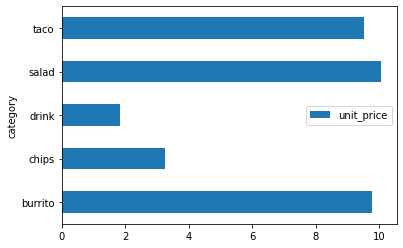

In [8]:
# I saw a lot of this - too small to read, not sorted, no title, no axes labels, ugly formatting output
grouped_cat.plot(y='unit_price',x='category',kind='barh')

In [9]:
# we can increase default figure and font sizes for easier viewing for all plots
import matplotlib.pyplot as plt
%matplotlib inline
plt.rcParams['figure.figsize'] = (10, 8)
plt.rcParams['font.size'] = 14

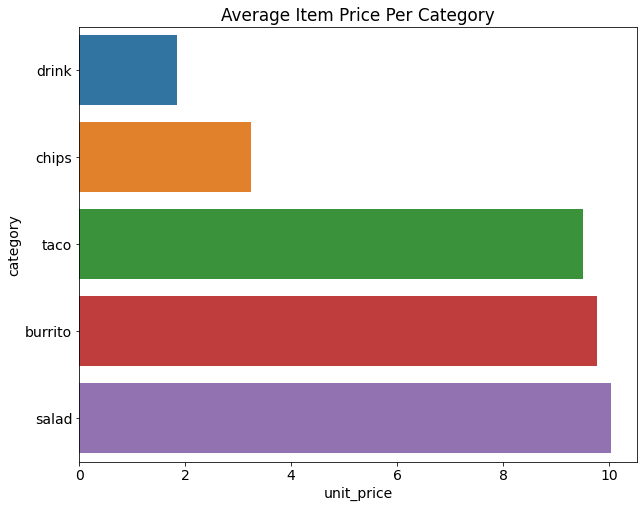

In [23]:
sns.barplot(data=grouped_cat.sort_values('unit_price'),x='unit_price',y='category')
# give it a title
plt.title('Average Item Price Per Category')
# use plt.show() to eliminate formatting
plt.show()

#### 8. What is the min, max, count, mean and standard deviation price per the `item_name`?

The count won't just be the length of each order's subset - there are multiple orders per row sometimes (evidenced in the quantity column).

### Elegant solution to group by

In [25]:
# Rob's solution to this question reduced grouping by multiple columns to one step
agg_chipotle = chipotle.groupby(['item_name','category']).agg(
    {'unit_price' : ['min','max','std','mean'], 'quantity' : 'sum'}).round(2)
agg_chipotle.head()

unit_price                     quantity
                                      min    max   std   mean      sum
item_name             category                                        
6 Pack Soft Drink     drink          6.49   6.49  0.00   6.49       55
Barbacoa Bowl         burrito        8.69  11.75  1.26  10.19       66
Barbacoa Burrito      burrito        8.69  11.75  1.14   9.83       91
Barbacoa Crispy Tacos taco           8.99  11.75  1.27  10.09       12
Barbacoa Salad Bowl   salad          9.39  11.89  1.32  10.64       10

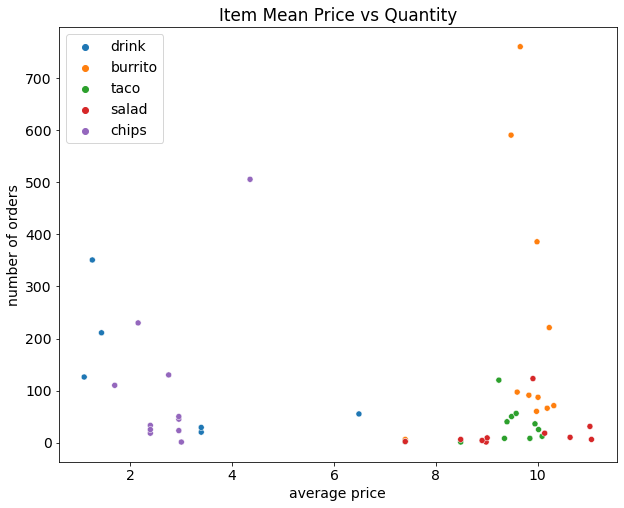

In [39]:
# hue parameter really helpful for grouping data; sns scatterplot function adds legend by default
sns.scatterplot(hue=[x[1] for x in agg_chipotle.index], x=agg_chipotle['unit_price']['mean'], 
                y=agg_chipotle['quantity']['sum'])

plt.title('Item Mean Price vs Quantity')
plt.xlabel('average price')
plt.ylabel('number of orders')

plt.show()